In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import unicodedata

pd.set_option('display.max_columns', None)
df = pd.read_csv("C:/Users/bolli/Downloads/Defunciones_Mex_2023.csv")

C:\Users\bolli\AppData\Local\Temp\ipykernel_27672\923843605.py:14: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/bolli/Downloads/Defunciones_Mex_2023.csv")


In [2]:
df

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,vio_fami,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,500 000 a 999 999 habitantes,1,Zacatecas,44,5 000 a 9 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,"Neumonía, no especificada",NaN,Neumonía,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y tres años,88,8888,18,12,2022,4,1,2023,8,4,1949,Sí,Profesores y especialistas en docencia,Profesional,Divorciado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No especificada,No aplica,ISSSTE,Otro médico,IMSS,No especificada,No especificada,21,50,10,2,Neumonía,NaN,Urbana,De 70 a 74 años,No especificada,18,Diciembre,2022,NaN,88,888,8888,NaN,999
1,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Síndrome de dificultad respiratoria del adulto,NaN,Las demás enfermedades del aparato respiratorio,Mujer,16,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y siete años,88,8888,12,12,2022,4,1,2023,12,7,1945,No,No trabaja,Sin escolaridad,Soltero(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Médico tratante,Ninguna,No especificada,No especificada,0,50,10,7,Resto de enfermedades del sistema respiratorio,NaN,Urbana,De 75 a 79 años,No especificada,12,Diciembre,2022,NaN,88,888,8888,NaN,999
2,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Enfermedad pulmonar obstructiva crónica con in...,NaN,Enfermedades pulmonares obstructivas crónicas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Sesenta y nueve años,88,8888,17,12,2022,4,1,2023,24,10,1953,No,No trabaja,Primaria incompleta,Viudo(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Otro médico,Ninguna,No especificada,No especificada,20,15,10,5,Enfermedades crónicas de las vías respirat...,NaN,Urbana,De 65 a 69 años,No especificada,17,Diciembre,2022,NaN,88,888,8888,NaN,999
3,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Desnutrición proteicocalórica leve,NaN,Otras desnutriciones proteinocalóricas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Noventa y cuatro años,88,8888,1,1,2023,5,1,2023,31,10,1928,No,No trabaja,Primaria incompleta,Soltero(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Hogar,Otro médico,Ninguna,No especificada,No especificada,13,0,4,5,Desnutrición,NaN,Urbana,De 90 a 94 años,No especificada,1,Enero,2023,NaN,88,888,8888,NaN,999
4,1,

In [3]:
df_final =  df[df["lista_mex"].isin(["Infarto agudo del miocardio", "Diabetes mellitus", "Neumonía", "Agresiones (homicidios)", "Otras enfermedades del hígado", "Enfermedades pulmonares obstructivas crónicas"])].reset_index()


In [4]:
df_final

,index,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,vio_fami,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,0,1,1,500 000 a 999 999 habitantes,1,Zacatecas,44,5 000 a 9 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,"Neumonía, no especificada",NaN,Neumonía,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y tres años,88,8888,18,12,2022,4,1,2023,8,4,1949,Sí,Profesores y especialistas en docencia,Profesional,Divorciado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No especificada,No aplica,ISSSTE,Otro médico,IMSS,No especificada,No especificada,21,50,10,2,Neumonía,NaN,Urbana,De 70 a 74 años,No especificada,18,Diciembre,2022,NaN,88,888,8888,NaN,999
1,2,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Enfermedad pulmonar obstructiva crónica con in...,NaN,Enfermedades pulmonares obstructivas crónicas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Sesenta y nueve años,88,8888,17,12,2022,4,1,2023,24,10,1953,No,No trabaja,Primaria incompleta,Viudo(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Otro médico,Ninguna,No especificada,No especificada,20,15,10,5,Enfermedades crónicas de las vías respirat...,NaN,Urbana,De 65 a 69 años,No especificada,17,Diciembre,2022,NaN,88,888,8888,NaN,999
2,7,1,1,2 500 a 4 999 habitantes,239,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,5,50 000 a 74 999 habitantes,1,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Ochenta y cuatro años,88,8888,15,11,2022,2,1,2023,20,10,1938,No,No trabaja,Primaria incompleta,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,IMSS,Médico tratante,IMSS,No especificada,No especificada,0,31,9,4,Enfermedades isquémicas del corazón,NaN,Urbana,De 80 a 84 años,No especificada,15,Noviembre,2022,NaN,88,888,8888,NaN,999
3,8,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,1 000 a 1 999 habitantes,127,Aguascalientes,1,1 000 a 1 999 habitantes,7777,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Hombre,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Cincuenta y cinco años,88,8888,7,1,2023,11,1,2023,27,2,1967,Sí,Trabajadores en actividades agrícolas y ganaderas,Primaria completa,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Sin asistencia médica,No especificada,No,No especificada,No aplica,No especificada,No aplica,Hogar,Otro médico,Ninguna,No aplica,No aplica,12,0,9,4,Enfermedades isquémicas del corazón,NaN,Rural,De 55 a 59 años,No aplica,7

In [5]:


rangos_pesos = {
    "Infarto agudo del miocardio": (60, 80),
    "Diabetes mellitus": (50, 80),
    "Neumonía": (50, 60),
    "Agresiones (homicidios)": (50, 75),
    "Otras enfermedades del hígado": (50, 75),
    "Enfermedades pulmonares obstructivas crónicas": (55, 65)
}


def asignar_peso(causa):
    if causa in rangos_pesos:
        rango = rangos_pesos[causa]
        return int(np.random.uniform(rango[0], rango[1]))
    else:
        return np.nan

df_final['Peso'] = df_final['lista_mex'].apply(asignar_peso)



In [6]:
df_final

,index,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,vio_fami,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax,Peso
0,0,1,1,500 000 a 999 999 habitantes,1,Zacatecas,44,5 000 a 9 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,"Neumonía, no especificada",NaN,Neumonía,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y tres años,88,8888,18,12,2022,4,1,2023,8,4,1949,Sí,Profesores y especialistas en docencia,Profesional,Divorciado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No especificada,No aplica,ISSSTE,Otro médico,IMSS,No especificada,No especificada,21,50,10,2,Neumonía,NaN,Urbana,De 70 a 74 años,No especificada,18,Diciembre,2022,NaN,88,888,8888,NaN,999,58
1,2,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Enfermedad pulmonar obstructiva crónica con in...,NaN,Enfermedades pulmonares obstructivas crónicas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Sesenta y nueve años,88,8888,17,12,2022,4,1,2023,24,10,1953,No,No trabaja,Primaria incompleta,Viudo(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Otro médico,Ninguna,No especificada,No especificada,20,15,10,5,Enfermedades crónicas de las vías respirat...,NaN,Urbana,De 65 a 69 años,No especificada,17,Diciembre,2022,NaN,88,888,8888,NaN,999,63
2,7,1,1,2 500 a 4 999 habitantes,239,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,5,50 000 a 74 999 habitantes,1,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Ochenta y cuatro años,88,8888,15,11,2022,2,1,2023,20,10,1938,No,No trabaja,Primaria incompleta,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,IMSS,Médico tratante,IMSS,No especificada,No especificada,0,31,9,4,Enfermedades isquémicas del corazón,NaN,Urbana,De 80 a 84 años,No especificada,15,Noviembre,2022,NaN,88,888,8888,NaN,999,61
3,8,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,1 000 a 1 999 habitantes,127,Aguascalientes,1,1 000 a 1 999 habitantes,7777,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Hombre,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Cincuenta y cinco años,88,8888,7,1,2023,11,1,2023,27,2,1967,Sí,Trabajadores en actividades agrícolas y ganaderas,Primaria completa,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Sin asistencia médica,No especificada,No,No especificada,No aplica,No especificada,No aplica,Hogar,Otro médico,Ninguna,No aplica,No aplica,12,0,9,4,Enfermedades isquémicas del corazón,NaN,Rural,De 55 a 59 añ

In [7]:
df_final['Peso'].value_counts()

Peso
63    14673
64    14514
61    14482
60    14467
62    14443
69    12733
72    12700
73    12685
68    12625
70    12613
65    12572
67    12553
71    12537
66    12465
74    12452
55    11345
57    11302
59    11229
58    11141
56    11097
76    10383
77    10278
79    10196
78    10162
75    10130
52     9411
51     9401
54     9361
53     9264
50     9242
Name: count, dtype: int64

In [8]:
def asignar_covid_influenza(causa):
    if causa in ["Neumonía", "Enfermedades pulmonares obstructivas crónicas"]:
        return np.random.choice(["Sí", "No"], p=[0.7, 0.3])  # 70% de probabilidad de "Sí"
    else:
        return np.random.choice(["Sí", "No"], p=[0.3, 0.7])  # 30% de probabilidad de "Sí"

df_final['COVID_Influenza'] = df_final['lista_mex'].apply(asignar_covid_influenza)


In [9]:
df_final

,index,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,vio_fami,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax,Peso,COVID_Influenza
0,0,1,1,500 000 a 999 999 habitantes,1,Zacatecas,44,5 000 a 9 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,"Neumonía, no especificada",NaN,Neumonía,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Setenta y tres años,88,8888,18,12,2022,4,1,2023,8,4,1949,Sí,Profesores y especialistas en docencia,Profesional,Divorciado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No especificada,No aplica,ISSSTE,Otro médico,IMSS,No especificada,No especificada,21,50,10,2,Neumonía,NaN,Urbana,De 70 a 74 años,No especificada,18,Diciembre,2022,NaN,88,888,8888,NaN,999,58,Sí
1,2,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,500 000 a 999 999 habitantes,1,Enfermedad pulmonar obstructiva crónica con in...,NaN,Enfermedades pulmonares obstructivas crónicas,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Sesenta y nueve años,88,8888,17,12,2022,4,1,2023,24,10,1953,No,No trabaja,Primaria incompleta,Viudo(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,Secretaría de salud,Otro médico,Ninguna,No especificada,No especificada,20,15,10,5,Enfermedades crónicas de las vías respirat...,NaN,Urbana,De 65 a 69 años,No especificada,17,Diciembre,2022,NaN,88,888,8888,NaN,999,63,Sí
2,7,1,1,2 500 a 4 999 habitantes,239,Aguascalientes,1,500 000 a 999 999 habitantes,1,Aguascalientes,5,50 000 a 74 999 habitantes,1,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Mujer,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Ochenta y cuatro años,88,8888,15,11,2022,2,1,2023,20,10,1938,No,No trabaja,Primaria incompleta,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Con asistencia médica,No especificada,No,No,No aplica,No,No aplica,IMSS,Médico tratante,IMSS,No especificada,No especificada,0,31,9,4,Enfermedades isquémicas del corazón,NaN,Urbana,De 80 a 84 años,No especificada,15,Noviembre,2022,NaN,88,888,8888,NaN,999,61,No
3,8,1,1,500 000 a 999 999 habitantes,1,Aguascalientes,1,1 000 a 1 999 habitantes,127,Aguascalientes,1,1 000 a 1 999 habitantes,7777,"Infarto agudo del miocardio, sin otra especifi...",NaN,Infarto agudo del miocardio,Hombre,1,No,No,No,No aplica,Mexicana,Mexicana (no especificado de Entidad Federativa),Cincuenta y cinco años,88,8888,7,1,2023,11,1,2023,27,2,1967,Sí,Trabajadores en actividades agrícolas y ganaderas,Primaria completa,Casado(a),Enfermedad (Muerte natural),No aplica para muerte natural y menores de 5 años,No aplica para muerte natural,No hubo violencia,No aplica cuando no es homicidio,Sin asistencia médica,No especificada,No,No especificada,No aplica,No especificada,No aplica,Hogar,Otro médico,Ninguna,No aplica,No aplica,12,0,9,4,Enfermedades isquémicas del corazó

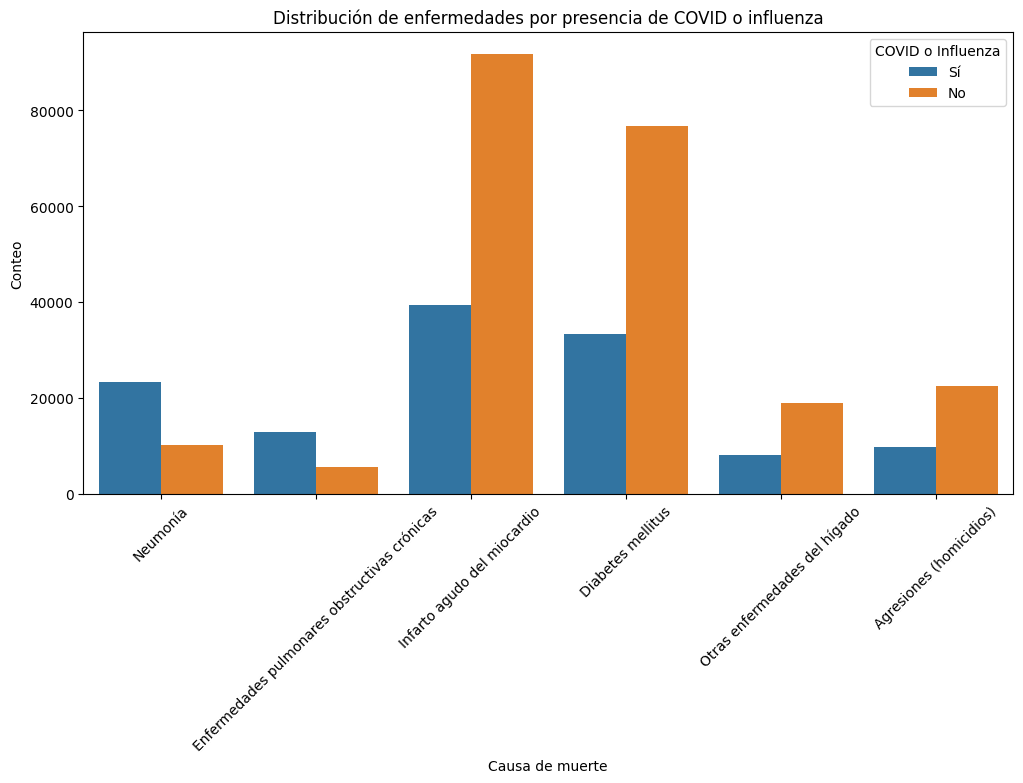

In [10]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x="lista_mex", hue="COVID_Influenza")
plt.title("Distribución de enfermedades por presencia de COVID o influenza")
plt.xlabel("Causa de muerte")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.legend(title="COVID o Influenza")
plt.show()


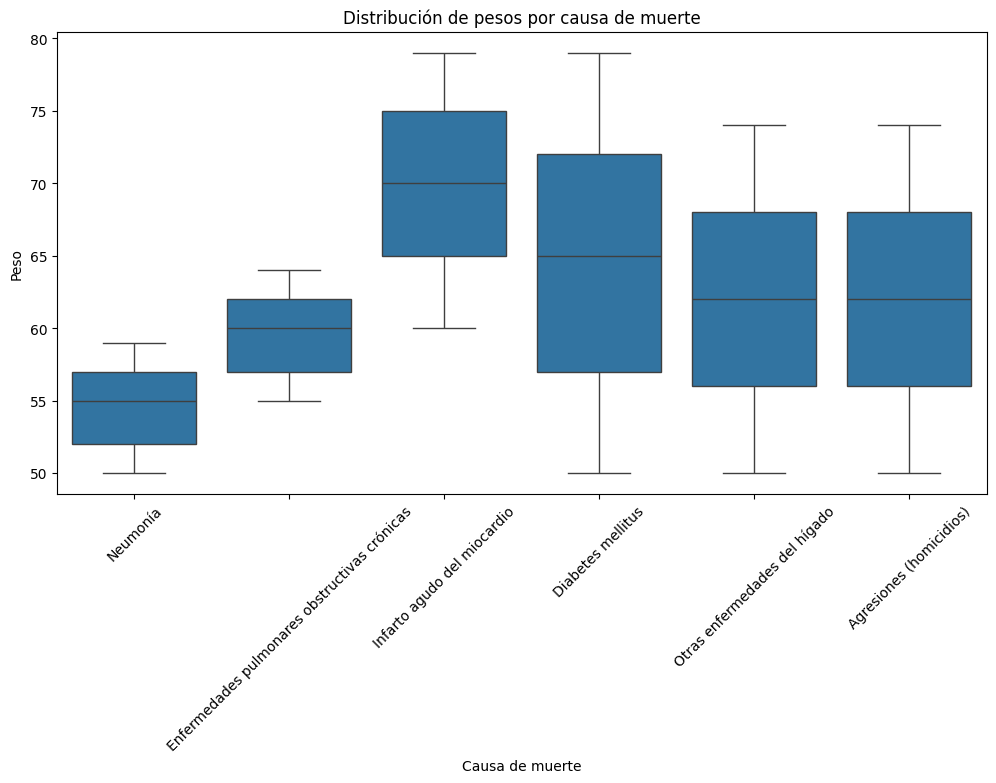

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x="lista_mex", y="Peso")
plt.title("Distribución de pesos por causa de muerte")
plt.xlabel("Causa de muerte")
plt.ylabel("Peso")
plt.xticks(rotation=45)
plt.show()


In [12]:
df_final = df_final[df_final['anio_ocur'] != 9999]
df_final = df_final[df_final['anio_nacim'] != 9999]
df_final['edad_final'] = df_final['anio_ocur'] - df_final['anio_nacim']

In [13]:
df_final['derechohab'] = df_final['derechohab'].str.strip()
df_final['derechohab'] = df_final['derechohab'].replace({
    'Instituto de Seguridad Social para las Fuerzas Armadas Mexicanas (ISSFAM)': 'ISSFAM',
    'Reportado como equivalente al Seguro Popular': 'Otra'
})

In [14]:
df_final['derechohab'].unique()

array(['IMSS', 'Ninguna', 'No especificada', 'Otra', 'ISSSTE',
       'IMSS BIENESTAR', 'SEDENA', 'ISSFAM', 'PEMEX', 'SEMAR'],
      dtype=object)

In [15]:
columnas_necesarias = ['sexo', 'edad_final', 'ocupacion', 'edo_civil', 'cond_act', 'derechohab','ent_ocurr','tloc_resid','mes_ocurr','horas', 'lista_mex', 'Peso', 'COVID_Influenza']
dff = df_final[columnas_necesarias]

dff

,sexo,edad_final,ocupacion,edo_civil,cond_act,derechohab,ent_ocurr,tloc_resid,mes_ocurr,horas,lista_mex,Peso,COVID_Influenza
0,Mujer,73,Profesores y especialistas en docencia,Divorciado(a),Sí,IMSS,Aguascalientes,5 000 a 9 999 habitantes,12,21,Neumonía,58,Sí
1,Mujer,69,No trabaja,Viudo(a),No,Ninguna,Aguascalientes,500 000 a 999 999 habitantes,12,20,Enfermedades pulmonares obstructivas crónicas,63,Sí
2,Mujer,84,No trabaja,Casado(a),No,IMSS,Aguascalientes,500 000 a 999 999 habitantes,11,0,Infarto agudo del miocardio,61,No
3,Hombre,56,Trabajadores en actividades agrícolas y ganaderas,Casado(a),Sí,Ninguna,Aguascalientes,1 000 a 1 999 habitantes,1,12,Infarto agudo del miocardio,72,No
4,Hombre,48,"Auxiliares y técnicos en ciencias exactas, bio...",Casado(a),Sí,Ninguna,Aguascalientes,5 000 a 9 999 habitantes,1,23,Infarto agudo del miocardio,65,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352451,Hombre,19,"Otros trabajadores en actividades agrícolas, g...",Soltero(a),Sí,No especificada,Zacatecas,1 a 999 habitantes,9,99,Agresiones (homicidios),53,Sí
352452,Mujer,24,No trabaja,Casado(a),No,No especificada,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),59,No
352453,Hombre,20,"Otros comerciantes, empleados en ventas y agen...",Soltero(a),Sí,Ninguna,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),59,No
352454,Hombre,40,Otros trabajadores en actividades elementales ...,Soltero(a),Sí,Ninguna,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),63,Sí


In [16]:
import unicodedata

def quitar_acentos(texto):
    if isinstance(texto, str):
        return ''.join(
            c for c in unicodedata.normalize('NFD', texto)
            if unicodedata.category(c) != 'Mn'
        )
    return texto

dff = dff.map(quitar_acentos)


dff

,sexo,edad_final,ocupacion,edo_civil,cond_act,derechohab,ent_ocurr,tloc_resid,mes_ocurr,horas,lista_mex,Peso,COVID_Influenza
0,Mujer,73,Profesores y especialistas en docencia,Divorciado(a),Si,IMSS,Aguascalientes,5 000 a 9 999 habitantes,12,21,Neumonia,58,Si
1,Mujer,69,No trabaja,Viudo(a),No,Ninguna,Aguascalientes,500 000 a 999 999 habitantes,12,20,Enfermedades pulmonares obstructivas cronicas,63,Si
2,Mujer,84,No trabaja,Casado(a),No,IMSS,Aguascalientes,500 000 a 999 999 habitantes,11,0,Infarto agudo del miocardio,61,No
3,Hombre,56,Trabajadores en actividades agricolas y ganaderas,Casado(a),Si,Ninguna,Aguascalientes,1 000 a 1 999 habitantes,1,12,Infarto agudo del miocardio,72,No
4,Hombre,48,"Auxiliares y tecnicos en ciencias exactas, bio...",Casado(a),Si,Ninguna,Aguascalientes,5 000 a 9 999 habitantes,1,23,Infarto agudo del miocardio,65,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352451,Hombre,19,"Otros trabajadores en actividades agricolas, g...",Soltero(a),Si,No especificada,Zacatecas,1 a 999 habitantes,9,99,Agresiones (homicidios),53,Si
352452,Mujer,24,No trabaja,Casado(a),No,No especificada,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),59,No
352453,Hombre,20,"Otros comerciantes, empleados en ventas y agen...",Soltero(a),Si,Ninguna,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),59,No
352454,Hombre,40,Otros trabajadores en actividades elementales ...,Soltero(a),Si,Ninguna,Zacatecas,100 000 a 249 999 habitantes,12,99,Agresiones (homicidios),63,Si


In [17]:
X = dff.drop('lista_mex', axis=1)
y = dff['lista_mex']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)

numerical_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(exclude=['int64', 'float64'])

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [ ]:

preprocesador = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features.columns),
        ('cat', categorical_transformer, categorical_features.columns)
    ]
)

model = Pipeline(
    steps=[
        ('preprocesor', preprocesador),
        ('class', RandomForestClassifier(n_estimators=400,random_state=42, n_jobs=-1))
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_test, y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f')